# 1.5 Text Mining

## This script contains the following:
#### 1. Import Libraries
#### 2. Import Data
#### 3. Tokenization with NLTK
#### 4. Filter Stop Words
    First filtering
    Second filtering (defining additional stop words)
    Observations
#### 5. Create Tag Lists with TextBlob
#### 6. Top POS Labels
    Observations
#### 7. Country Mentions Frequency
    Observations
#### 8. Sentiment Analysis
    Expectations
    Observations

### 1. Import Libraries

In [5]:
# Importing libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewjones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewjones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/matthewjones/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/matthewjones/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/matthewjones/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### 2. Import Data

In [7]:
# Open the txt file
import os

path = os.path.join(os.path.dirname('/Users/matthewjones/Documents/CareerFoundry/Data Visualization with Python/Achievement 1/20th-Century/02. Data/'), '20th Century Events.txt')

myfile = open(path, 'r', encoding='utf-8') 

In [8]:
# Import and read the txt file
import os

with open(path, 'r', errors='ignore') as file:
    article = file.read().replace('\n', '')

### 3. Tokenization

Turning the full article into a series of words or individual portions to be analyzed

In [11]:
# Use NLTK to tokenize the txt file
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(article)

In [12]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)

In [13]:
# Display the most common 10 tokens
dist_words.most_common(10)

[('.', 1277),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 397),
 ('to', 326),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

In [14]:
# Create a dataframe from the list
df_base_dist = pd.DataFrame(dist_words.most_common(10))
df_base_dist.columns = ['Words', "Frequency"]

Text(0, 0.5, 'Frequency')

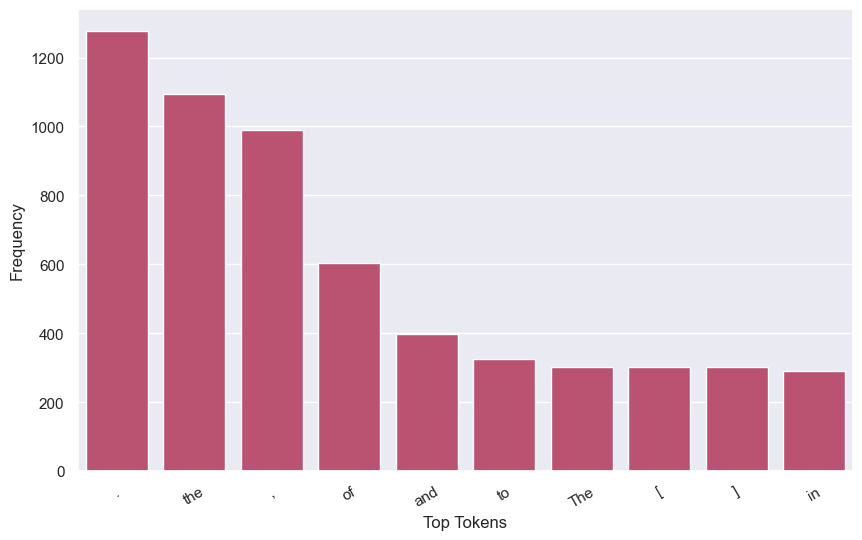

In [15]:
# Frequency Distribution Bar Plot
base_dist_fig = plt.figure(figsize = (10, 6))
sns.barplot(data = df_base_dist, x = 'Words', y = 'Frequency', color = '#cb416b')

# Formatting for title and axes
plt.title('')
plt.xticks(rotation = 30)
plt.xlabel('Top Tokens')
plt.ylabel('Frequency')

### 4. Filter Stop Words

Removing from consideration words and punctuation that do not yield meaningful results

In [18]:
# Import the stopwords module and create a set
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

### First filtering

In [20]:
# Remove stopwords from set
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [42]:
# Substitute all punctuations marks with a space 
sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",   # Replace all non-letters with spaces
                          str(filtered_words))

In [23]:
# Word tokenization
tokenized_filtered = word_tokenize(sans_punc)

NameError: name 'sans_punc' is not defined

In [ ]:
# Create a new FreqDist of the tokenized words
tokenized_filtered_dist = FreqDist(tokenized_filtered)
df_filtered_dist = pd.Series(tokenized_filtered_dist).to_frame().reset_index()
df_filtered_dist.columns = ['Words', 'Frequency']
df_filtered_dist = df_filtered_dist.sort_values(by = ['Frequency'], ascending = False)

# Check the output
df_filtered_dist.head(20)

In [ ]:
# Frequency Distribution Bar Plot
filtered_fig = plt.figure(figsize = (10,6))
sns.barplot(data = df_filtered_dist.head(10), x = 'Words', y = 'Frequency', color = '#cb416b')

# Formatting for title and axes
plt.title('')
plt.xticks(rotation = 30)
plt.xlabel('Top Words')
plt.ylabel('Frequency')

### Second Filtering (defining additional stop words)

In [ ]:
# Define new stop words
new_stopwords = ['And', 'Then', 'n', 't', 's', 'S', 'The', 'www', 'th', 'ISBN']

In [ ]:
# Remove stopwords from set
filtered_words_2 = [] # Creates an empty list
for word in tokenized_filtered:
    if word not in new_stopwords:
        filtered_words_2.append(word)

In [ ]:
# Substitute all punctuations marks with a space 
sans_punc_2 = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",   # Replace all non-letters with spaces
                          str(filtered_words_2))

In [ ]:
# Word tokenization
tokenized_filtered_2 = word_tokenize(sans_punc_2)

In [ ]:
# Create a new FreqDist
tokenized_filtered_dist_2 = FreqDist(tokenized_filtered_2)
df_filtered_dist_2 = pd.Series(tokenized_filtered_dist_2).to_frame().reset_index()
df_filtered_dist_2.columns = ['Words', 'Frequency']
df_filtered_dist_2 = df_filtered_dist_2.sort_values(by = ['Frequency'], ascending = False)

# Check the output
df_filtered_dist_2.head(20)

In [ ]:
# Frequency Distribution Bar Plot
filtered_fig_2 = plt.figure(figsize = (10,6))
sns.barplot(data = df_filtered_dist_2.head(10), x = 'Words', y = 'Frequency', color = '#cb416b')

# Formatting for title and axes
plt.title('')
plt.xticks(rotation = 30)
plt.xlabel('Top Words')
plt.ylabel('Frequency')

### Observations
    1. The most common word was 'Retrieved' with a capital R. This likely means the word starts 
    sentences. I find it difficult to imagine many sentences that would start with 'Retrieved', 
    so this may be the go-to syntax for references. And it's likely there were 200+ references 
    for this article.
    
    2. All of the other top words refer to either the First or Second World War. These were 
    indeed significant events of the 20th century so this does make sense. These events involved 
    many countries, so I predict this means we'll see a dense network at these points.
    
    3. Both 'War' and 'war' are included as separate words, and 'World' and 'world' are as well. 
    This shows that it is important to distinguish between proper nouns and common nouns. This 
    frequency chart shows that World War I and World War II appeared more frequently than any other 
    war combined.

### 5. Create Tag Lists with TextBlob

Figuring out the parts of speech of the remaining words

In [ ]:
%%time 
#Measures the execution time of the following code


# Create a TextBlob object from the filtered words list
text = TextBlob(str(filtered_words_2))

In [ ]:
# Assign tags to each word
tags_list = text.tags

In [ ]:
# Create a dataframe from the list
df_text_tagged = pd.DataFrame(tags_list)
df_text_tagged.columns = ['Words', "Word type"]

# Check the output
df_text_tagged.head(10)

In [ ]:
# Group the words by their tag and count how many words were assigned to each tag
df_POS_tags = df_text_tagged.groupby('Word type').count().reset_index().sort_values(by = ['Words'], ascending = False)
df_top_POS_tags = df_POS_tags.head(10).reset_index().drop(['index'], axis = 1)

# Check the output
df_top_POS_tags

In [ ]:
# Frequency Distribution Bar Plot
filtered_fig_2 = plt.figure(figsize = (10,6))
sns.barplot(data = df_top_POS_tags, x = 'Word type', y = 'Words', color = '#cb416b')

# Formatting for title and axes
plt.title('')
plt.xticks(rotation = 30)
plt.xlabel('Top POS Tags')
plt.ylabel('Frequency')

### 6. Top POS Labels

Discovering patterns in the words used in the article

In [ ]:
# Create lists of POS labels for nouns, verbs, and adjectives
nounPOS = ['NN', 'NNS', 'NNP', 'NNPS']
verbPOS = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adjectivePOS = ['JJ', 'JJR', 'JJS']

# Subset dataframe to isolate words tagged as nouns, verbs, and adjectives
df_nouns = df_text_tagged.loc[df_text_tagged['Word type'].isin(nounPOS)]
df_verbs = df_text_tagged.loc[df_text_tagged['Word type'].isin(verbPOS)]
df_adjectives = df_text_tagged.loc[df_text_tagged['Word type'].isin(adjectivePOS)]

In [ ]:
# Group by the words in each dataframe, and count to see which words are most frequent in each grammar category
df_noun_freq = df_nouns.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)
df_verb_freq = df_verbs.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)
df_adjective_freq = df_adjectives.groupby('Words').count().reset_index().sort_values(by = ['Word type'], ascending = False)

In [ ]:
# Frequency Distribution Bar Plot (NOUN)
noun_fig = plt.figure(figsize = (10, 6))
sns.barplot(data = df_noun_freq.head(15), x = 'Words', y = 'Word type', color = '#cb416b')

# Formatting for title and axes
plt.title('Frequency of the Top Nouns', fontsize = 15)
plt.xticks(rotation = 30)
plt.xlabel('Top Nouns')
plt.ylabel('Frequency')

In [ ]:
# Frequency Distribution Bar Plot (VERB)
verb_fig = plt.figure(figsize = (10, 6))
sns.barplot(data = df_verb_freq.head(15), x = 'Words', y = 'Word type', color = '#cb416b')

# Formatting for title and axes
plt.title('Frequency of the Top Verbs', fontsize = 15)
plt.xticks(rotation = 30)
plt.xlabel('Top Verbs')
plt.ylabel('Frequency')

In [ ]:
# Frequency Distribution Bar Plot (ADJECTIVE)
adjective_fig = plt.figure(figsize = (10, 6))
sns.barplot(data = df_adjective_freq.head(15), x = 'Words', y = 'Word type', color = '#cb416b')

# Formatting for title and axes
plt.title('Frequency of the Top Adjectives', fontsize = 15)
plt.xticks(rotation = 30)
plt.xlabel('Top Adjectives')
plt.ylabel('Frequency')

### Observations
    These charts show that TextBlob's labeling is not 100% accurate. In the noun chart, words like 'first', 'in', and 'new' are included. These are not nouns, and it's curious why they were included. In the verb chart, words like 'United', 'States', and 'Allied' are included. It's understandable why they were labeled as verbs, but they are proper nouns in the context of this article. The word 'including' is also likely being used as a preposition in this article. In the adjective chart, the top words are demonyms that refer to individual countries. The word 'Interest' is also likely being used as a noun in this article.
    
    The other notable observation is that individual nouns are much more common than individual verbs or adjectives. For verbs, 'Retrieved' is a significant outlier. And most other verbs in the top 15 aren't mentioned more than 10 times. And these are the most common verbs. Adjectives follow the same pattern with 'Japanese' and 'American' being outliers.

### 7. Country Mentions Frequency

Using both the article and a list of countries to discover patterns in which countries are mentioned the most

In [ ]:
# Join each element in the list into a single string separated by a space
listToStr = ' '.join([str(elem) for elem in filtered_words_2])

In [ ]:
# Split the string into individual words at each space, and count the occurrences of each word
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [ ]:
# Import the list of countries as a dataframe
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [ ]:
# Check the shape (209 countries)
countries.shape

In [ ]:
# Check the output
countries.head()

In [ ]:
# Create aliases for countries with more than one word in their name
# There wasn't a uniform way to isolate their alias, so I did not use a function for this task
# Some countries were left untouched because they were not mentioned in the article

countries['country_name'] = countries['country_name'].replace("  China, People's Republic of ", "China")
countries['country_name'] = countries['country_name'].replace("   Micronesia, Federated States of ", "Micronesia")
countries['country_name'] = countries['country_name'].replace("   New Zealand ", "Zealand")
countries['country_name'] = countries['country_name'].replace("   North Macedonia ", "Macedonia")
countries['country_name'] = countries['country_name'].replace("   Papua New Guinea ", "Papua")
countries['country_name'] = countries['country_name'].replace("  Antigua and Barbuda ", "Barbuda")
countries['country_name'] = countries['country_name'].replace(" Bahamas, The ", "Bahamas")
countries['country_name'] = countries['country_name'].replace("  Bosnia and Herzegovina ", "Bosnia")
countries['country_name'] = countries['country_name'].replace("  Burkina Faso ", "Faso")
countries['country_name'] = countries['country_name'].replace("  Cape Verde ", "Verde")
countries['country_name'] = countries['country_name'].replace("  East Timor ", "Timor")
countries['country_name'] = countries['country_name'].replace("  Costa Rica ", "Rica")
countries['country_name'] = countries['country_name'].replace("   El Salvador ", "Salvador")
countries['country_name'] = countries['country_name'].replace("   Gambia, The ", "Gambia")
countries['country_name'] = countries['country_name'].replace("  Saint Kitts and Nevis ", "Kitts")
countries['country_name'] = countries['country_name'].replace("   Saint Lucia ", "Lucia")
countries['country_name'] = countries['country_name'].replace("   Saint Vincent and the Grenadines ", "Grenadines")
countries['country_name'] = countries['country_name'].replace("   San Marino ", "Marino")
countries['country_name'] = countries['country_name'].replace("   São Tomé and Príncipe ", "Príncipe")
countries['country_name'] = countries['country_name'].replace("   Saudi Arabia ", "Arabia")
countries['country_name'] = countries['country_name'].replace("   Sierra Leone ", "Leone")
countries['country_name'] = countries['country_name'].replace("   São Tomé and Príncipe ", "Príncipe")
countries['country_name'] = countries['country_name'].replace("   Solomon Islands ", "Solomon")
countries['country_name'] = countries['country_name'].replace("   Sri Lanka ", "Lanka")
countries['country_name'] = countries['country_name'].replace("   Trinidad and Tobago ", "Trinidad")
countries['country_name'] = countries['country_name'].replace("   United Arab Emirates ", "Emirates")
countries['country_name'] = countries['country_name'].replace("   United Kingdom ", "Kingdom")
countries['country_name'] = countries['country_name'].replace("   United States ", "States")
countries['country_name'] = countries['country_name'].replace("    Vatican City (Holy See) ", "Vatican")
countries['country_name'] = countries['country_name'].replace("   Cook Islands ", "Cook")

# I could not find a reasonable for some countries. For instance, South Africa: just using South would include 
# all other mentions of this word and not just the country, and just using Africa would include all other
# mentions of the entire continent.

# Other countries that fall in this dilemma: South Sudan, Democratic Republic of the Congo, Republic of the 
# Congo, Central African Republic, North Korea, South Korea, Equatorial Guinea, Marshall Islands, and Dominican Republic

# The country Czechoslovakia ceased to exist during this century, but it was split up into the two countries
# now known as Czech Republic and Slovakia. What would be the best way to assign mentions to these countries?

In [ ]:
# Convert the 'country_name' column into a list
country_list = countries['country_name'].to_list()

In [ ]:
cleaned_country_list = []

for item in country_list:
    cleaned_country_list.append(item.strip())
    
print (cleaned_country_list)

In [ ]:
# Create a dictionary where for every country in 'country_list' we assign it the word occurrence 
# count from 'all_counts'
dict_of_counts = {d : all_counts[d] for d in cleaned_country_list}

In [ ]:
# Invert the dictionary and make it into a dataframe
dct = {v:[k] for v,k in dict_of_counts.items()}  
df_country_mentions = pd.DataFrame(dct)

In [ ]:
# Transpose the dataframe
df_country_mentions = df_country_mentions.transpose().reset_index()

In [ ]:
# Rename the columns to be more intuitive
df_country_mentions.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [ ]:
# Sort the dataframe by putting the most frequently mentioned countries at the top
df_country_mentions = df_country_mentions.sort_values('Times mentioned', axis = 0, ascending = False)

# Check the output
df_country_mentions

In [ ]:
# Frequency Distribution Bar Plot
country_mentions_freq = plt.figure(figsize = (10, 6))
sns.barplot(data = df_country_mentions.head(15), x = 'Country', y = 'Times mentioned', color = '#cb416b')

# Formatting for title and axes
plt.title('Frequency of the Country Mentions', fontsize = 15)
plt.xticks(rotation = 30)
plt.xlabel('Top Countries')
plt.ylabel('Frequency')

### Observations
    Germany and Japan were the most mentioned countries in the article. This makes sense fiven the other results. Both of the World Wars were the most mentioned events, and Germany was involved with both of these wars. And the most common adjective was 'Japanese', so it makes sense that Japan was one of the most mentioned countries.
    
    The other most mentioned countries all made sense, however it seems the article has a strong Western bias. Half of the countries are in Europe. While they certainly were important in the 20th century, the article discounts the events and the impact of events happening elsewhere in the world. In 2024, we're seeing the ramifications of the conflicts in the Middle East. Yet, countries like Saudi Arabia and Palestine are not mentioned at all. And Egypt is only mentioned in passing (not in reference to the unrest in the Middle East). This is just one example of the events the article omitted. But it's important to recognize that if our resources only teach us about certain historical events, then it is natural for readers to deem those events as most important. So by omitting certain historical events, we are also weighing them as less important. And it's important to recognize who is making those decisions of which history is most important to remember.

### 8. Sentiment Analysis

Identifying the underlying mood of the article

#### Expectations
    One of the most common nouns from our analysis was 'war'. While I don't know how certain words 
    are rated on polarity, I would imagine 'war' has a negative polarity score. I would also 
    imagine that the article focuses on the conflicts between nations which could push the polarity 
    score to be negative overall.
    
    This article is fact-based. I expect the subjectivity of this article to be close to 0.

In [ ]:
text_sent = TextBlob(str(filtered_words_2))
print(text_sent.sentiment)

#### Observations
    The polarity score is close to 0, meaning there is no significant difference between the 
    negativity and the positivity of the analysis. I would be curious to read the article to 
    see if this matches the content.
    
    The subjectivity score was 0.35, which is much more subjective than I imagined. The 
    subjectivity of Lewis Carroll's novel was only slightly higher (0.50) than this Wikipedia 
    article. Again, I would be curious to read the article to see if this matches the content. 
    However, because the content on Wikipedia articles is added by individual users, it would 
    be reasonable that those users may use more subjective language.